In [277]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PyEMD import EMD, EEMD
import numpy as np
from sklearn.decomposition import PCA
from src.features.utilities import chop_timeseries

import src.features.DWT_all_features as DWT_features
import src.features.EEMD_all_features as EEMD_features

In [278]:
# Load data
with open('data/Case_2_a_only_basic_DQ', 'rb') as f:
    ((data1_1_df, data1_2_df, data1_3_df),(mean1_df,std1_df)) = pickle.load(f)

data1_df = pd.concat([data1_1_df,data1_2_df,data1_3_df],axis=0)
data1_df = data1_df * std1_df + mean1_df

(imin,_) = next((i, el) for i, el in enumerate(data1_df.HDEP.values) if el < 200)
data_df = data1_df.iloc[imin:]

In [279]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]]

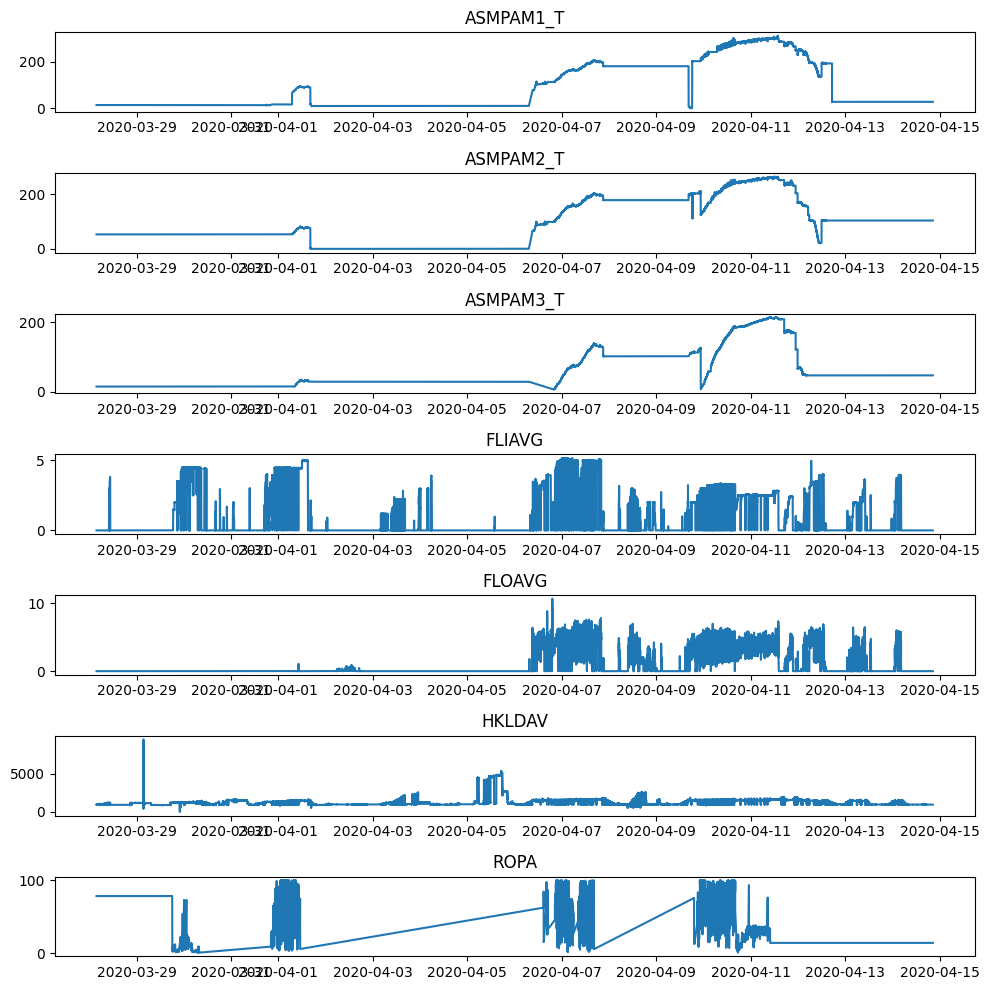

In [281]:
plt.subplots(len(data.keys()),1, figsize=(10, 10))
for i,key in enumerate(data.keys()):
    plt.subplot(len(data.keys()),1,i+1)
    plt.plot(data[key])
    plt.title(key)
    plt.tight_layout()

In [38]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]].iloc[1130000:1230000]

(array([18349.91666667, 18351.91666667, 18352.91666667, 18354.91666667,
        18356.91666667, 18358.91666667, 18360.91666667, 18362.91666667,
        18364.91666667, 18366.91666667]),
 [Text(18349.916666666668, 0, '2020-03-29'),
  Text(18351.916666666668, 0, '2020-03-31'),
  Text(18352.916666666668, 0, '2020-04-01'),
  Text(18354.916666666668, 0, '2020-04-03'),
  Text(18356.916666666668, 0, '2020-04-05'),
  Text(18358.916666666668, 0, '2020-04-07'),
  Text(18360.916666666668, 0, '2020-04-09'),
  Text(18362.916666666668, 0, '2020-04-11'),
  Text(18364.916666666668, 0, '2020-04-13'),
  Text(18366.916666666668, 0, '2020-04-15')])

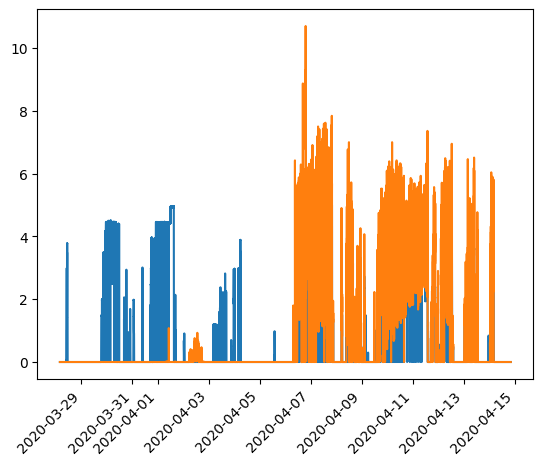

In [285]:
ax = plt.plot(data[["FLIAVG", "FLOAVG"]])
for label in ax.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')

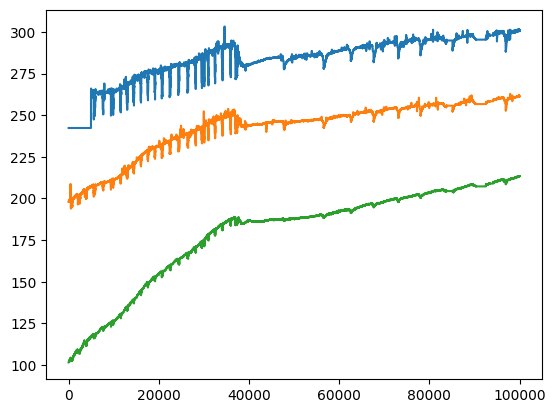

In [40]:
plt.plot(data[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T"]].values)

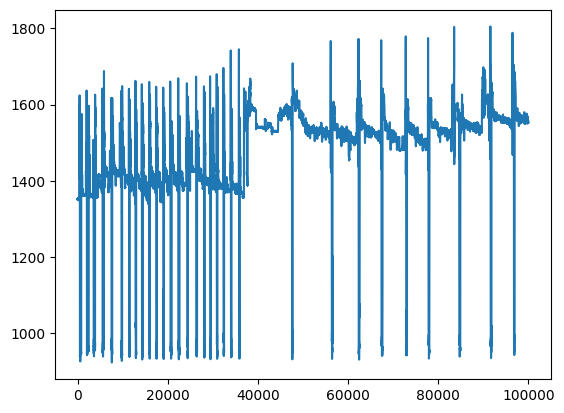

In [41]:
plt.plot(data["HKLDAV"].values)

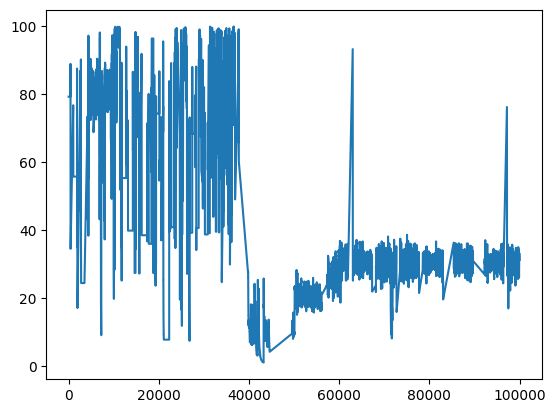

In [42]:
plt.plot(data[["ROPA"]].values)

In [43]:
data.mean()

ASMPAM1_T     283.414657
ASMPAM2_T     242.210855
ASMPAM3_T     179.197181
FLIAVG          2.503425
FLOAVG          3.774538
HKLDAV       1469.502046
ROPA           40.037923
dtype: float64

In [262]:
feature_names = ["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]
feature_types = ["DWT_complete_samples", "EEMD_complete_samples", "EMD_complete_samples", "EEMD_DWT_complete_samples", "EMD_DWT_complete_samples", "noDecomp_complete"]

path = lambda feature_name, feature_type: f"features/new_features/{feature_name}/{feature_type}.csv"

all_features = pd.DataFrame()
for feature_name in feature_names:
    for feature_type in feature_types:
        f = pd.read_csv(path(feature_name, feature_type))
        all_features = pd.concat([all_features, f], axis=1)

In [263]:
all_features.dropna(inplace=True, axis=1)

In [264]:
all_features.shape

(100, 16254)

In [265]:
# Perform PCA on dwt dataframe
pca = PCA()
pca.fit(all_features)

PCA()

In [266]:
chopped_timeseries = chop_timeseries(data, 1000)

In [267]:
scores = pca.fit_transform(all_features)

In [268]:
cmap = plt.get_cmap("winter", len(chopped_timeseries))
timeseries_plot = []
for i, timeseries in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeseries), (i+1)*len(timeseries), len(timeseries)), 'x': timeseries, 'col': cmap(i)})

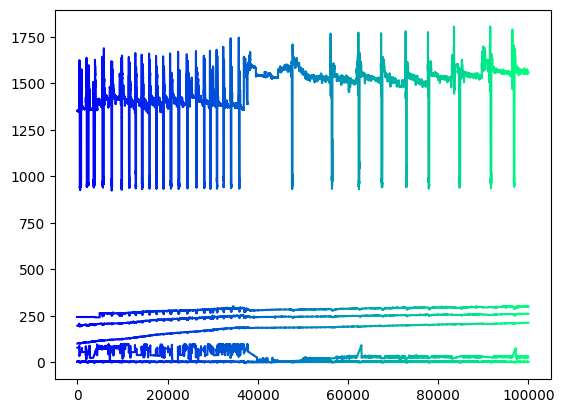

In [269]:
for timeserie in timeseries_plot:
    plt.plot(timeserie['t'], timeserie['x'], color=timeserie['col'])
plt.savefig("figures/timeseries.png")

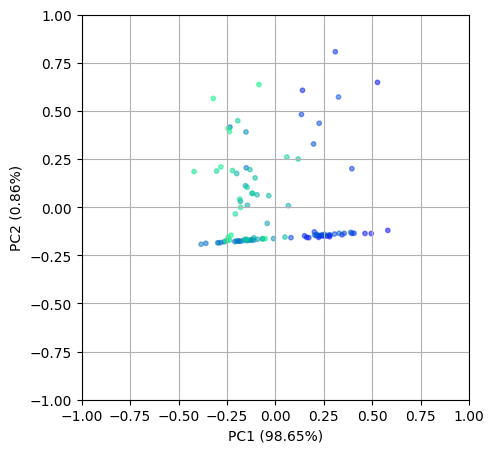

In [270]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")

plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

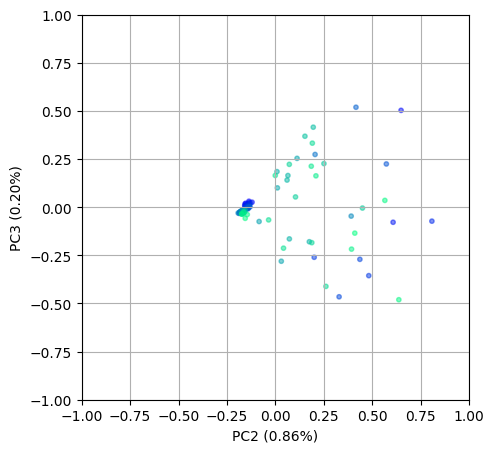

In [174]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,1]
ys = scores[:,2]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

/tmp/ipykernel_549922/1827867974.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)
/tmp/ipykernel_549922/1827867974.py:27: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()
/tmp/ipykernel_549922/1827867974.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)
/tmp/ipykernel_549922/1827867974.py:40: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


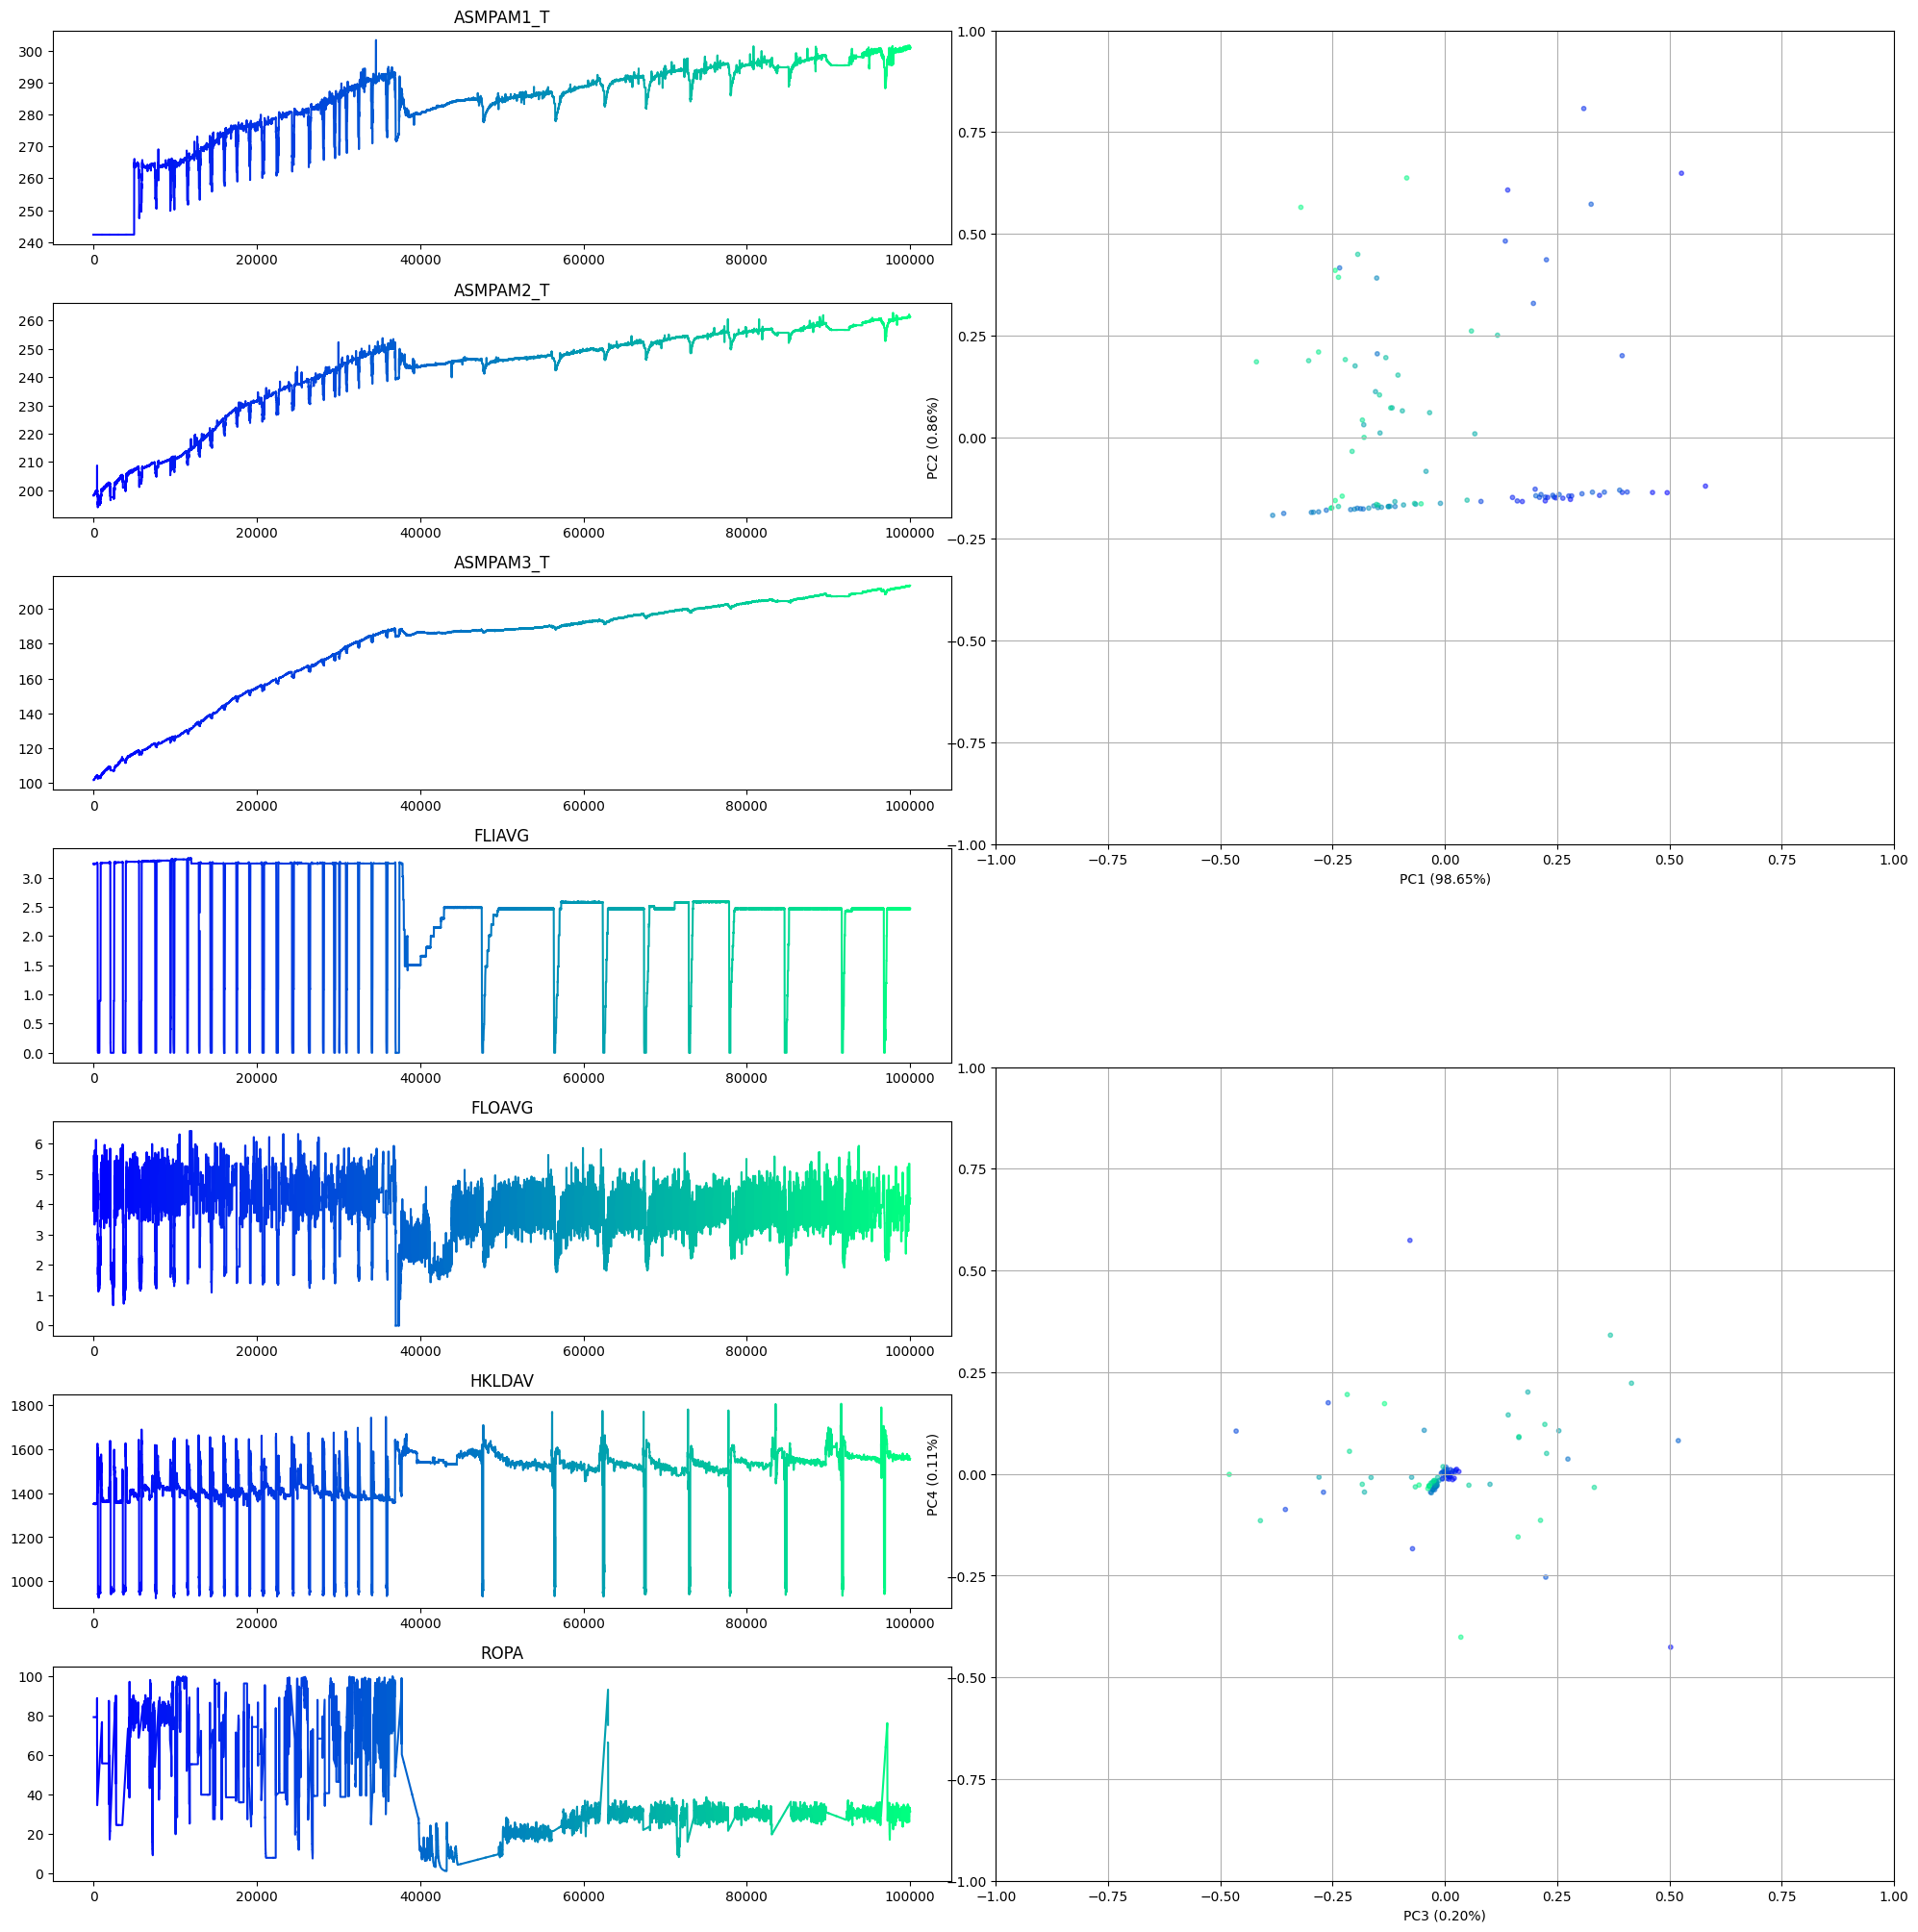

In [162]:
cmap = plt.get_cmap("winter", len(chopped_timeseries))
timeseries_plot = []
for i, timeseries in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeseries), (i+1)*len(timeseries), len(timeseries)), 'x': timeseries, 'col': cmap(i)})

fig, ax = plt.subplots(7, 2, figsize=(20,20), constrained_layout=True)

for timeseries in timeseries_plot:
    for i, k in enumerate(timeseries['x'].keys()):
        plt.subplot(7, 2, 2*i+1)
        plt.plot(timeseries['t'], timeseries['x'][k], color=timeseries['col'])
        plt.title(k)
        plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 2)
xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 4)
xs = scores[:,2]
ys = scores[:,3]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.2f}%)")
plt.grid()
plt.tight_layout()

#Remove the plot at subplot (7, 2, 8)
plt.delaxes(plt.subplot(7, 2, 8))

plt.show()
fig.savefig("figures/PCA.png", dpi=300)

In [ ]:
all_features.dropna(axis=0, inplace=True)

In [ ]:
all_features

,Unnamed: 0,ASMPAM1_T_level_0_mean,ASMPAM1_T_level_0_std,ASMPAM1_T_level_0_skew,ASMPAM1_T_level_0_max,ASMPAM1_T_level_0_median,ASMPAM1_T_level_0_min,ASMPAM1_T_level_0_energy,ASMPAM1_T_level_0_entropy,ASMPAM1_T_level_0_zcr_mean,...,28,29,30,31,32,33,34,35,36,37


In [ ]:
# Perform PCA on dwt dataframe
pca = PCA()
pca.fit(all_features)

PCA()

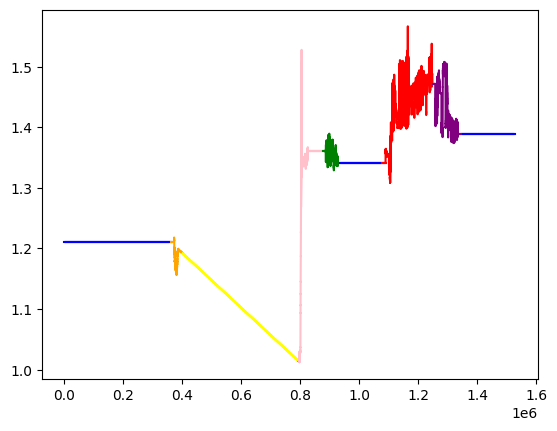

In [ ]:
for i, timeserie in enumerate(timeseries_plot):
    if (i > 1075) and (i < 1250):
        plt.plot(timeserie['t'], timeserie['x'], color="red")
    elif (i > 1250) and (i < 1350):
        plt.plot(timeserie['t'], timeserie['x'], color="purple")
    elif (i > 400) and (i < 795):
        plt.plot(timeserie['t'], timeserie['x'], color="yellow")
    elif (i > 795) and (i < 876):
        plt.plot(timeserie['t'], timeserie['x'], color="pink")
    elif (i > 875) and (i < 935):
        plt.plot(timeserie['t'], timeserie['x'], color="green")
    elif(i > 360) and (i < 410):
        plt.plot(timeserie['t'], timeserie['x'], color="orange")
    else:
        plt.plot(timeserie['t'], timeserie['x'], color="blue") #color=timeserie['col'])
plt.savefig("figures/timeseries.png")

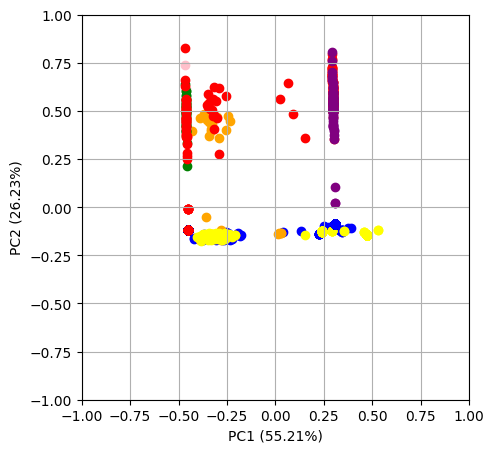

In [ ]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
for i, (x, y) in enumerate(zip(xs, ys)):
    if (i > 1075) and (i < 1250):
        plt.scatter(x * scalex, y * scaley, color="red")
    elif (i > 1250) and (i < 1350):
        plt.scatter(x * scalex, y * scaley, color="purple")
    elif (i > 400) and (i < 775):
        plt.scatter(x * scalex, y * scaley, color="yellow")
    elif (i > 795) and (i < 876):
        plt.scatter(x * scalex, y * scaley, color="pink")
    elif (i > 875) and (i < 935):
        plt.scatter(x * scalex, y * scaley, color="green")
    elif(i > 350) and (i < 410):
        plt.scatter(x * scalex, y * scaley, color="orange")
    else:
        plt.scatter(x * scalex, y * scaley, color="blue") #c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

In [ ]:
explained_variance = pca.explained_variance_ratio_[:10] / np.sum(pca.explained_variance_ratio_[:10]) * 100

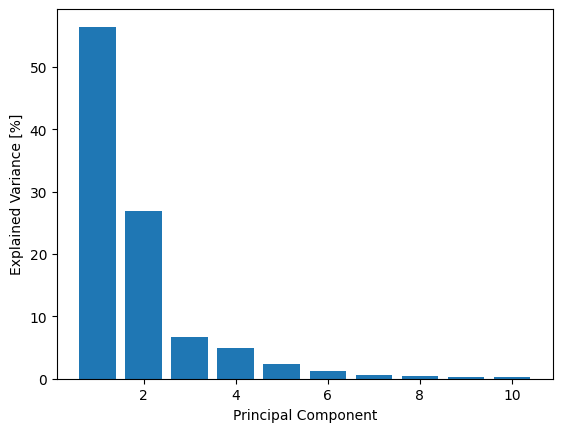

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance [%]")
plt.show()